we want to predict global sale price using Gradient boost for regression

In [299]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
# import graphviz
import re


data = pd.read_csv("vgsales.csv")
size = len(data)
data.info()
size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


16598

In [300]:
data.shape

(16598, 11)

In [301]:
data.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,0.263768,0.145958,0.077801,0.048070,0.537498
std,4791.853933,0.816594,0.505120,0.309294,0.188588,1.555113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


5 of them are not numerical data 

In [302]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [303]:
data = data.dropna()

In [304]:
print("number of rows: ", data.shape[0])
print("number of columns: ",data.shape[1])
print("number of unique games: ",data['Name'].nunique())
print("number of unique genre: " ,data['Genre'].nunique())
print("number of unique platforms: ",data['Platform'].nunique() )
print("number of unique years: ",data['Year'].nunique())
print("number of unique publishers: ",data['Publisher'].nunique())


number of rows:  16289
number of columns:  11
number of unique games:  11323
number of unique genre:  12
number of unique platforms:  31
number of unique years:  39
number of unique publishers:  576


In [305]:
train = 0.8
test = 0.2
sale = pd.DataFrame(data['Global_Sales'])  
platform = pd.DataFrame(data['Platform'])   
genre = pd.DataFrame(data['Genre'])
year = pd.DataFrame(data['Year'])

platform_train = pd.DataFrame(platform[:int(train*size)])
genre_train = pd.DataFrame(genre[:int(train*size)])
year_train = pd.DataFrame(year[:int(train*size)])

platform_test = pd.DataFrame(platform[-int(test*size):])
genre_test = pd.DataFrame(genre[-int(test*size):])
year_test = pd.DataFrame(year[-int(test*size):])

Gradient Boosting :
1. optimizing loss function ( we are trying to reduce the lossfunction =(0.5( actual - predicted)^2)
2. decision tree
3. classification and regression (both)
4. uses gradient(loss) of the model as a input to the next model 

In [306]:
#response variable : Year
predictors = ["Year", "Platform", "Genre"]
Y = data.Global_Sales
X = pd.DataFrame(data[predictors])


totalcategoricalvalues = list(np.unique(X["Platform"])) + list(np.unique(X["Genre"]))
totalcategoricalvalues
print(len(totalcategoricalvalues))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# sb.catplot(y = "Year", data = y_train, kind = "count")
# trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)
# platform_train["Platform"].value_counts()

43


In [307]:
le_main = preprocessing.LabelEncoder()
le_main.fit(totalcategoricalvalues)

X_train = pd.DataFrame()
Y_train = pd.DataFrame()

X_train["Genre"] = le_main.transform(X["Genre"])
X_train["Platform"] = le_main.transform(X["Platform"])
Y_train = Y
print(X_train)
print(Y_train)

       Genre  Platform
0         34        38
1         25        15
2         27        38
3         34        38
4         28         8
...      ...       ...
16284     25         9
16285     32        10
16286     27        20
16287     26         6
16288     25         9

[16289 rows x 2 columns]
0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16289, dtype: float64


In [308]:
mappings = pd.DataFrame()
mappings["class"] = le_main.classes_
mappings["encoded"] = le_main.transform(le_main.classes_)
mappings

,class,encoded
0,2600,0
1,3DO,1
2,3DS,2
3,Action,3
4,Adventure,4
5,DC,5
6,DS,6
7,Fighting,7
8,GB,8
9,GBA,9


In [309]:
clf = DecisionTreeRegressor(random_state= 1234,max_depth = 3)
model = clf.fit(X_train,Y_train)

In [310]:
predictedValues = model.predict(X_train)
errors = Y_train-predictedValues
print(errors)
print(sum(abs(errors)))

0        82.140153
1        39.228383
2        35.220153
3        32.400153
4        30.770153
           ...    
16593    -1.001617
16594    -0.589847
16595    -0.589847
16596    -0.589847
16597    -1.001617
Name: Global_Sales, Length: 16289, dtype: float64
9510.24939923356


In [311]:
clf2 = DecisionTreeRegressor(random_state= 2345,max_depth = 3)
model2 = clf.fit(X_train,errors)

In [312]:
predictedValues = model2.predict(X_train)
errors2 = Y_train-predictedValues
print(errors2)
print(sum(abs(errors2)))

0        82.502806
1        40.255358
2        35.582806
3        32.762806
4        31.385358
           ...    
16593     0.025358
16594     0.025358
16595     0.025358
16596     0.025358
16597     0.025358
Name: Global_Sales, Length: 16289, dtype: float64
9229.403936248968


In [313]:

def printTree(clfInput, iterName):
    print(" -- " + iterName + " -- ")
    dot_data = tree.export_graphviz(clfInput,
                                    out_file=None,
                                    feature_names=X_train.columns,
                                    class_names=np.unique(Y),
                                    filled = True)
#     g = graphviz.Source(dot_data, format="png")
    print(tree.export_text(clfInput))
    print(" -- -- ")
#     g.render("Output2/" + iterName, view=False)
    

In [314]:
lastY = Y_train
boostedDF = pd.DataFrame()
boostingErrors = pd.DataFrame()
boostingPredicted = pd.DataFrame()

predictionList = []
tmplist = []
for i in range(1,10):
    dtr1 = DecisionTreeRegressor(random_state=8888,max_depth = 3)
    model = dtr1.fit(X_train,lastY)
    predictedValues = model.predict(X_train)
    newerrors = lastY - predictedValues
    itername = "Iteration" + str(i)
    boostedDF [itername] = newerrors
    lastY = newerrors
    totalerrors = sum(abs(newerrors))
    tmplist.append(totalerrors)
    boostingPredicted[itername] = predictedValues
    printTree(dtr1,itername)
boostingErrors["TotalErrors"] = tmplist
    

 -- Iteration1 -- 
|--- feature_0 <= 19.00
|   |--- feature_0 <= 3.50
|   |   |--- feature_1 <= 18.00
|   |   |   |--- value: [0.37]
|   |   |--- feature_1 >  18.00
|   |   |   |--- value: [0.61]
|   |--- feature_0 >  3.50
|   |   |--- feature_0 <= 5.50
|   |   |   |--- value: [0.18]
|   |   |--- feature_0 >  5.50
|   |   |   |--- value: [0.49]
|--- feature_0 >  19.00
|   |--- feature_0 <= 25.50
|   |   |--- feature_1 <= 39.50
|   |   |   |--- value: [1.01]
|   |   |--- feature_1 >  39.50
|   |   |   |--- value: [0.28]
|   |--- feature_0 >  25.50
|   |   |--- feature_0 <= 34.50
|   |   |   |--- value: [0.60]
|   |   |--- feature_0 >  34.50
|   |   |   |--- value: [0.26]

 -- -- 
 -- Iteration2 -- 
|--- feature_1 <= 30.50
|   |--- feature_1 <= 22.50
|   |   |--- feature_1 <= 20.50
|   |   |   |--- value: [-0.02]
|   |   |--- feature_1 >  20.50
|   |   |   |--- value: [0.18]
|   |--- feature_1 >  22.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- value: [-0.38]
|   |   |--- feature_0 

# Exploratory Analysis

## Platform, Year, Publisher,Genre against Global_Sales

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

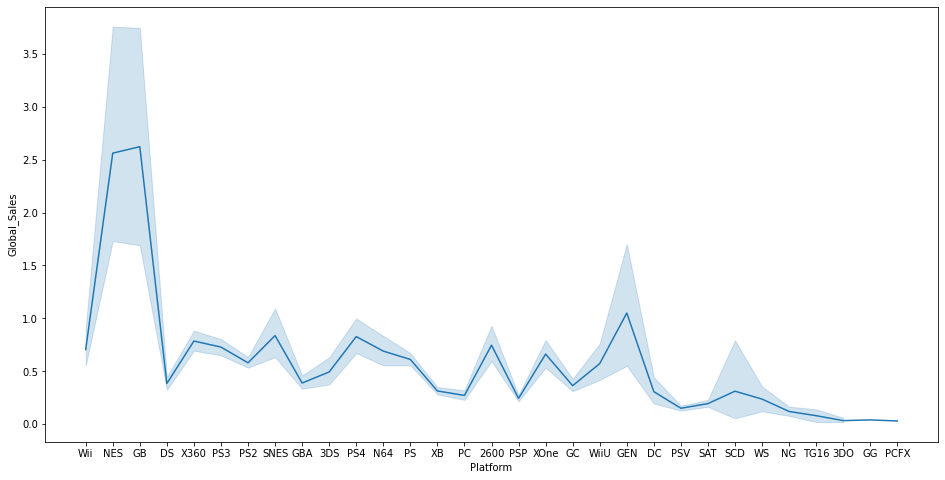

In [315]:
f = plt.figure(figsize=(16, 8))
sb.lineplot(x="Platform", y="Global_Sales", data=data)

### NES and GB platforms have the most sales 

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

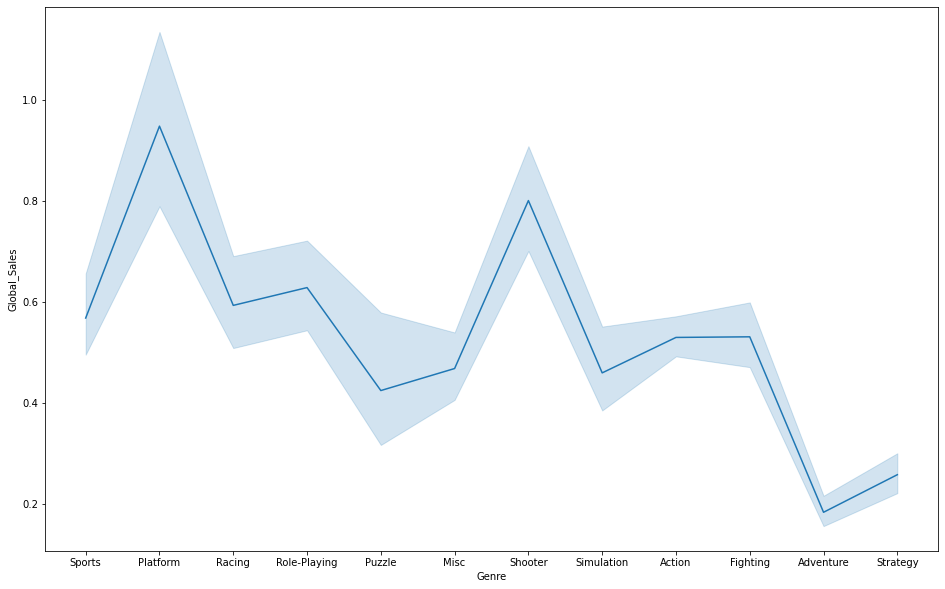

In [316]:
f = plt.figure(figsize=(16, 10))
sb.lineplot(x="Genre", y="Global_Sales", data=data)

### Platform, followed by shooter genre have the most Sales

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

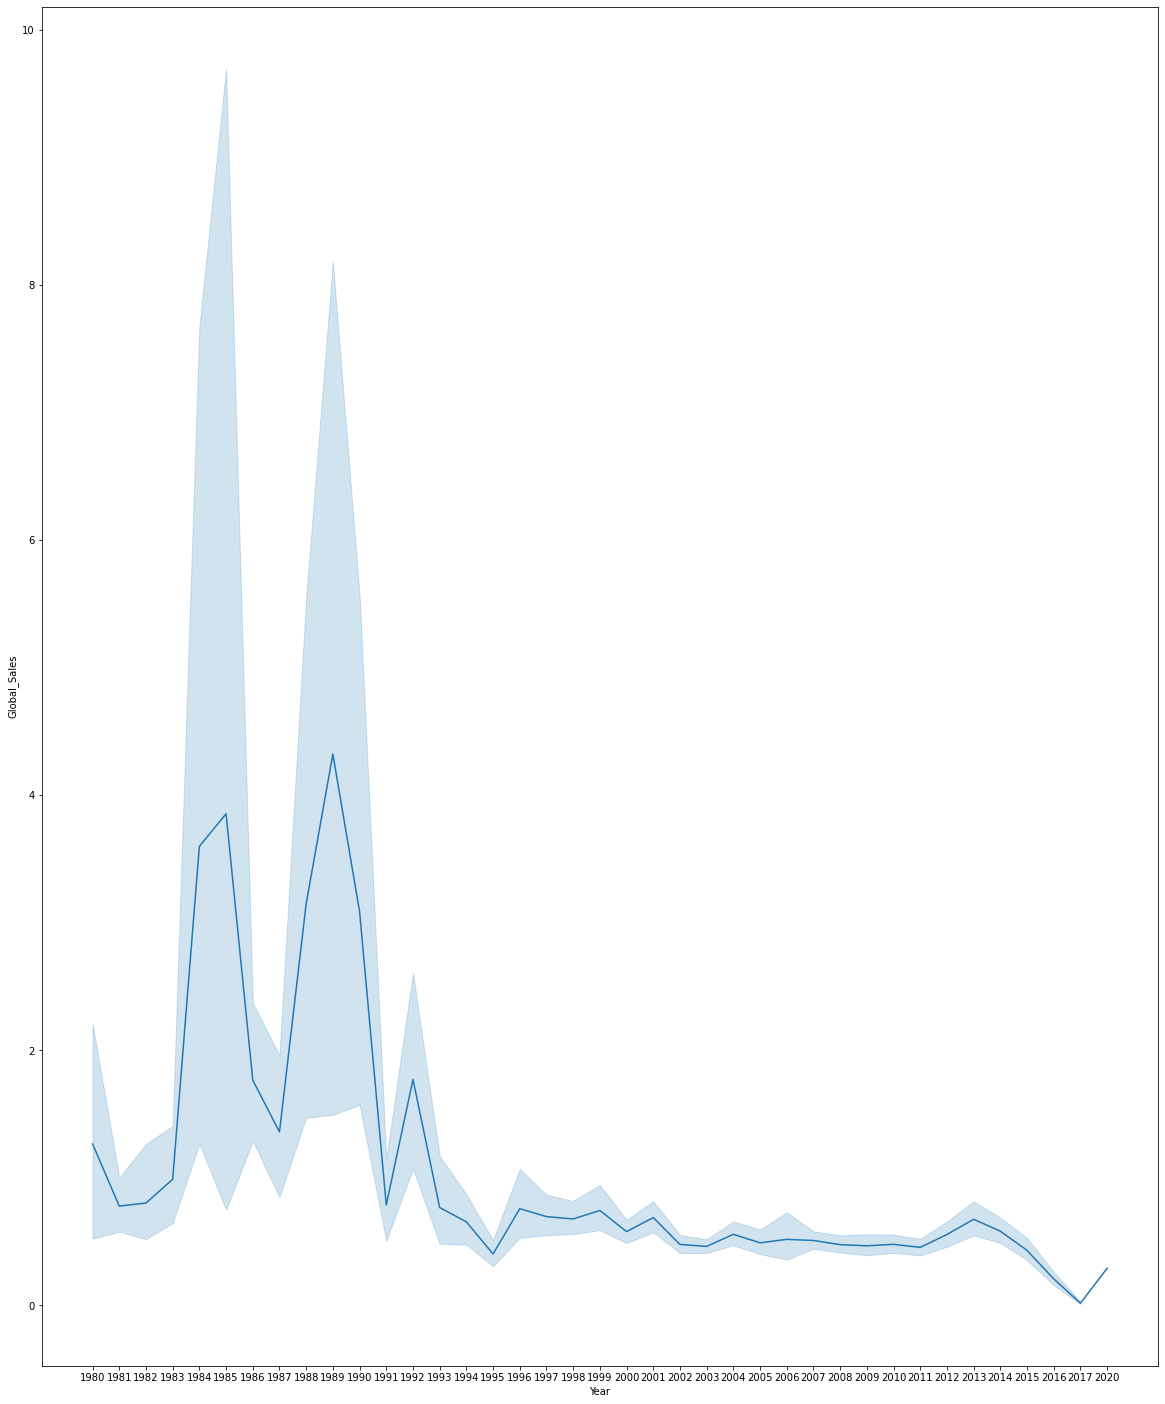

In [317]:
f = plt.figure(figsize=(20, 25))
sb.lineplot(x="Year", y="Global_Sales", data=data.sort_values(by="Year"))

### On year 1984,1985,1988, 1989 they have the most sales compared to other years

<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

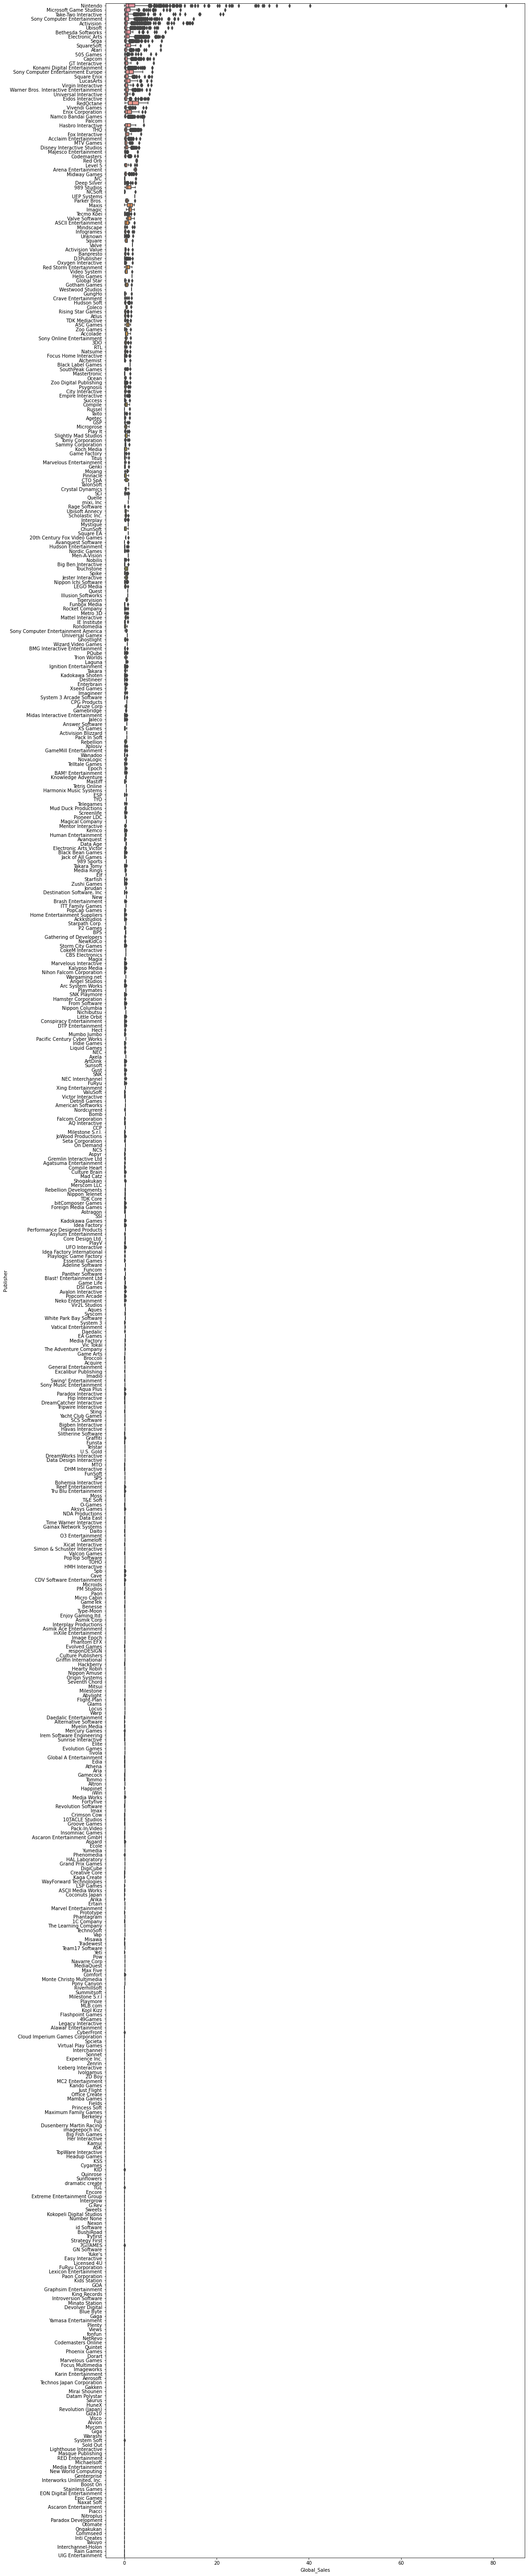

In [318]:
f = plt.figure(figsize=(16, 100))
sb.boxplot(x="Global_Sales", y="Publisher", data=data)

### Nintendo has the most number of sales

## Year,Publisher, Platform,Genre against Count

In [319]:
catdata = pd.DataFrame(data[["Year","Publisher","Platform","Genre"]])
catdata = catdata.astype('category')

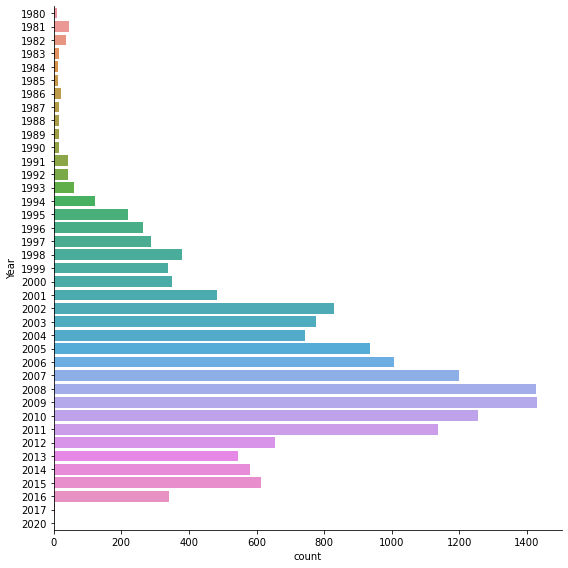

In [320]:
sb.catplot(y = 'Year', data = catdata, kind = "count", height = 8)

### year2008-2009 shows the most number of VG in the market(peak of VG)

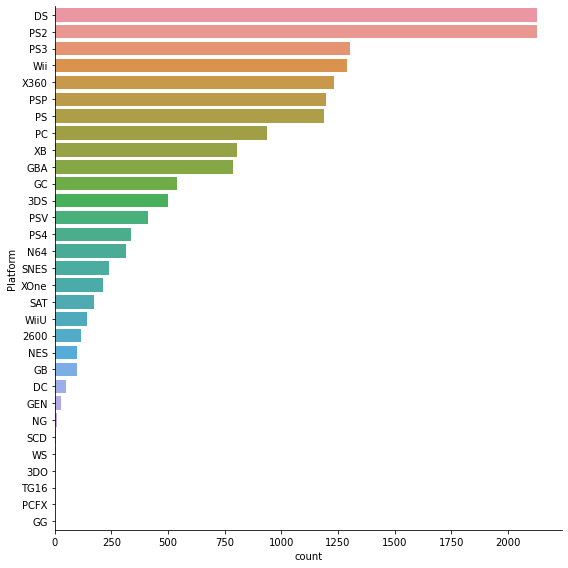

In [321]:
sb.catplot(y = 'Platform',  data = catdata, 
           kind = "count", 
           height = 8, 
           order = catdata['Platform'].value_counts().index)

### DS and PS2 (most of the games' platform are DS and PS2)

In [322]:
sb.catplot(y = 'Publisher',  data = catdata, 
           kind = "count", 
           height = 100, 
           order = catdata['Publisher'].value_counts().index)

### Electronic arts published the most number of games

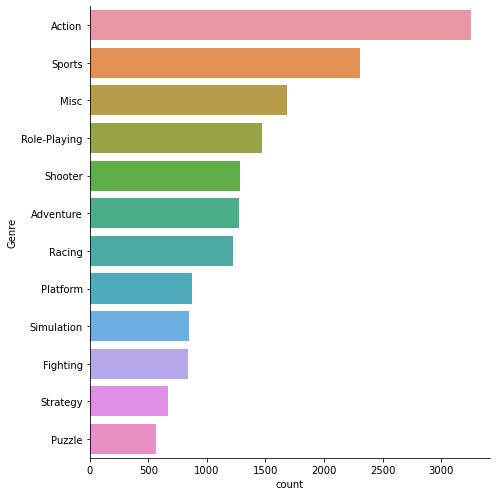

In [323]:
sb.catplot(y = 'Genre',  data = catdata, 
           kind = "count", 
           height = 7, 
           order = catdata['Genre'].value_counts().index)

### Most of the games in the market are Action genre

# Highest Global_Sales

In [324]:
columns = ['Publisher','Name','Platform','Genre','Year']

In [325]:
for i in columns:
        print(i)
        print(pd.pivot_table(data=data,index = [i],values = 'Global_Sales').sort_values('Global_Sales',ascending=False))

Publisher
                       Global_Sales
Publisher                          
Palcom                     4.170000
Red Orb                    2.620000
Nintendo                   2.563836
Arena Entertainment        2.360000
UEP Systems                2.250000
...                             ...
Ascaron Entertainment      0.010000
Otomate                    0.010000
Ongakukan                  0.010000
Michaelsoft                0.010000
Paradox Development        0.010000

[576 rows x 1 columns]
Name
                                      Global_Sales
Name                                              
Wii Sports                                   82.74
Mario Kart Wii                               35.82
Wii Sports Resort                            33.00
Pokemon Red/Pokemon Blue                     31.37
New Super Mario Bros.                        30.01
...                                            ...
Wizardry XTH: Unlimited Students              0.01
Jinsei Game Q DS: Shouwa no Dekigo

# Regression model

### Refining the Models to Predict Global_Sales (exercise 4 solution) 

Remove outliers for Global_Sales

Global_Sales    1826
dtype: int64

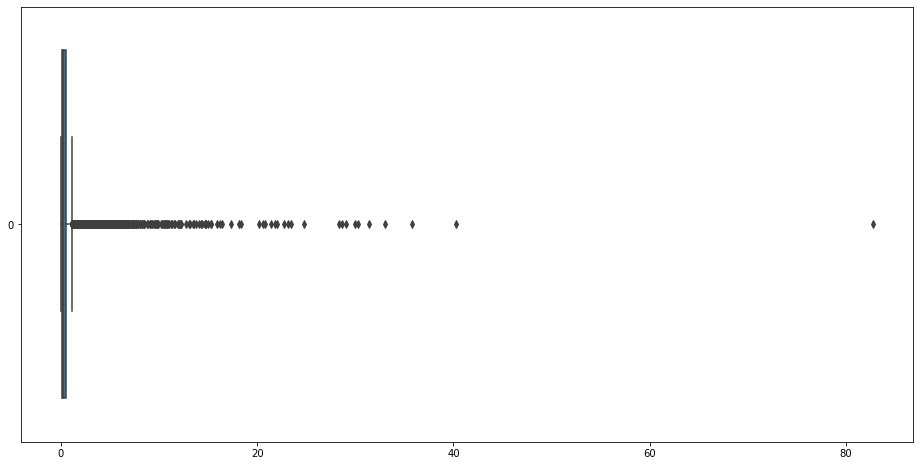

In [326]:
targetData = data[['Global_Sales']].copy()
# Draw the boxplots
f = plt.figure(figsize=(16, 8))

sb.boxplot(data = targetData["Global_Sales"], orient = "h")

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [327]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,Global_Sales
0,True
1,True
2,True
3,True
4,True
...,...
16593,False
16594,False
16595,False
16596,False


In [328]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0         True
1         True
2         True
3         True
4         True
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16289, dtype: bool

In [329]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    14463
True      1826
dtype: int64

In [330]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1836, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846],
           dtype='int64', length=1826)

In [331]:
# Remove the outliers based on the row indices obtained above
data.drop(               # 0 drops row 1 drops column
        index = outlierindices, # this takes a list as input
       inplace = True)         # not overwritten by default 
# Check the clean data
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1847,1849,Guitar Hero 5,PS3,2009,Misc,Activision,0.53,0.40,0.00,0.17,1.10
1848,1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.00,0.01,1.10
1849,1851,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12,1.10
1850,1852,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,0.52,0.33,0.17,0.08,1.10
1851,1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.00,0.01,1.10
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [332]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(data['Global_Sales'])
X = pd.DataFrame(data[['Publisher','Genre','Year','Platform']])
X = X.astype('category')
X["Publisher_encoded"] = X["Publisher"].cat.codes
X['Genre_encoded'] = X["Genre"].cat.codes
X['Year'] = pd.to_numeric(X['Year'])
X['Platform_encoded'] = X["Platform"].cat.codes
X.head()
X_encoded_data = pd.DataFrame(X[['Platform_encoded','Genre_encoded','Publisher_encoded','Year']])
data["Publisher_encoded"] = X["Publisher"].cat.codes
data['Genre_encoded'] = X["Genre"].cat.codes
data['Year'] = pd.to_numeric(X['Year'])
data['Platform_encoded'] = X["Platform"].cat.codes
# Split the Dataset into random Train and Test

X_train, X_test, y_train, y_test = train_test_split(X_encoded_data, y, test_size = 0.1)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (13016, 4) (13016, 1)
Test Set  : (1447, 4) (1447, 1)


# Gradient Boosting Regressor

In [333]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(learning_rate= 0.1,
                                         n_estimators = 500,
                                        max_depth= 3)
gbr.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(n_estimators=500)

In [334]:
gbr.score(X_train,y_train)

0.30481443516352746

In [335]:
gbr.score(X_test,y_test)

0.2228440547902597

In [336]:
rf = ensemble.RandomForestRegressor(random_state= 42)
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [337]:
rf.score(X_train,y_train)

0.7065254258866065

In [338]:
rf.score(X_test,y_test)

0.039861474063537905

In [347]:
game_pred = data[data["Name"].isin(["Guitar Hero 5", "Jungle Hunt", "Know How 2"])]
game_pred

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_encoded,Genre_encoded,Platform_encoded
1847,1849,Guitar Hero 5,PS3,2009,Misc,Activision,0.53,0.40,0.0,0.17,1.10,21,3,17
1851,1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.0,0.01,1.10,52,4,0
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.00,0.01,8,5,4


In [352]:
# Extract Predictors for Prediction

predictors = ["Year", "Platform_encoded", "Genre_encoded","Publisher_encoded"]
X_pred = pd.DataFrame(game_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = gbr.predict(X_pred)
y_pred

array([0.9548075 , 0.95836299, 1.04630108])

In [354]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = game_pred.index)
gamedata_acc = pd.concat([game_pred[["Name", "Global_Sales"]], y_pred], axis = 1)

y_errs =  100*abs(gamedata_acc["Global_Sales"] - gamedata_acc["PredTotal"]) / gamedata_acc["Global_Sales"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = game_pred.index)
gamedata_acc = pd.concat([gamedata_acc, y_errs], axis = 1)

gamedata_acc



,Name,Global_Sales,PredTotal,Error
1847,Guitar Hero 5,1.10,0.954807,13.199319
1851,Jungle Hunt,1.10,0.958363,12.876092
16596,Know How 2,0.01,1.046301,10363.010792





Using Video games names to predicting globals sales based on publisher, year, genre and platform

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py